![rmotr](https://i.imgur.com/jiPp4hj.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/39119320-cfd265fe-46eb-11e8-8b3f-49f2e67cf93f.jpg"
    style="width:300px; float: right; margin: 0 40px 40px 40px;"></img>

# Sorting, Binning and Categories practice

We'll use a Dataset from NBA players and salaries to practice our the skills of cutting, binning, sorting and categorical data handling.

The dataset can be found in `data/nba_salaries_positions_2017.csv` ([source data.world](https://data.world/datadavis/nba-salaries)). And our objective is to understand a little bit better how salaries in the NBA work.

![separator2](https://i.imgur.com/4gX5WFr.png)

## Hands on! 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(palette="muted", color_codes=True)

%matplotlib inline

A nice trick to display floats nicely:

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

We import the Dataset, the first column (player's name) will be the index:

In [3]:
df = pd.read_csv('data/nba_salaries_positions_2017.csv', index_col=0)

In [4]:
df.head()

,salary,season_start,season_end,team,team_name,Pos,Age
player,,,,,,,
Kent Bazemore,16910113,2017,2018,ATL,Atlanta Hawks,SF,27.00
Dennis Schroder,15500000,2017,2018,ATL,Atlanta Hawks,PG,23.00
Miles Plumlee,12500000,2017,2018,ATL,Atlanta Hawks,C,28.00
Jamal Crawford,10942762,2017,2018,ATL,Atlanta Hawks,SG,36.00
Marco Belinelli,6606060,2017,2018,ATL,Atlanta Hawks,SG,30.00


In [5]:
df.describe()

,salary,season_start,season_end,Age
count,500.00,500.00,500.00,400.00
mean,"6,640,380.41","2,017.00","2,018.00",26.16
std,"7,343,168.83",0.00,0.00,4.29
min,"17,224.00","2,017.00","2,018.00",19.00
25%,"1,471,382.00","2,017.00","2,018.00",23.00
50%,"3,125,365.50","2,017.00","2,018.00",26.00
75%,"10,000,000.00","2,017.00","2,018.00",29.00
max,"34,682,550.00","2,017.00","2,018.00",40.00


Seems like there's a wide range of salaries, the less paid player makes `$17,224` while the highest paid makes `$34,682,550`.

In [6]:
min_salary, max_salary = df['salary'].describe()[['min', 'max']]

In [7]:
min_salary, max_salary

(17224.0, 34682550.0)

Let's see how they're are distributed:

In [8]:
salaries = df['salary']

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


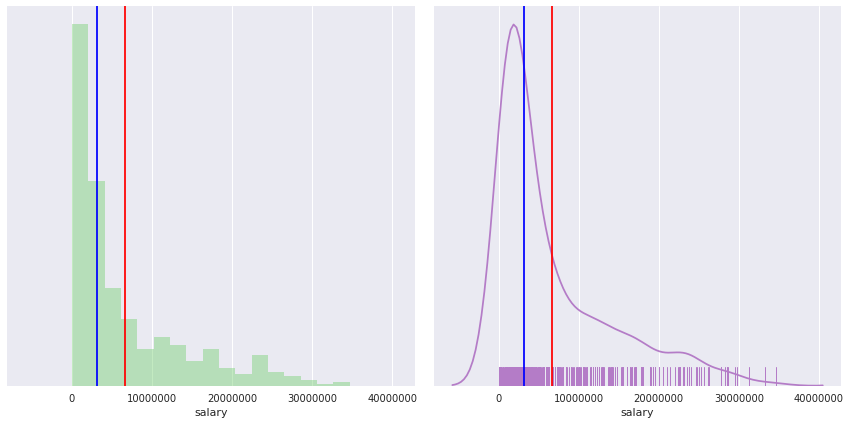

In [11]:
f, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True)

[ax.get_xaxis().get_major_formatter().set_scientific(False) for ax in axes.ravel()]

sns.despine(left=True)

sns.distplot(salaries, kde=False, color="g", ax=axes[0])
sns.distplot(salaries, hist=False, rug=True, color="m", ax=axes[1])

plt.setp(axes, yticks=[])

[ax.axvline(salaries.median(), color='blue') for ax in axes]
[ax.axvline(salaries.mean(), color='red') for ax in axes]

plt.tight_layout()

Seems like there are many folks on the left side of the distribution, and a very few that make a ton of money. Let's explore the cumulative sums:

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


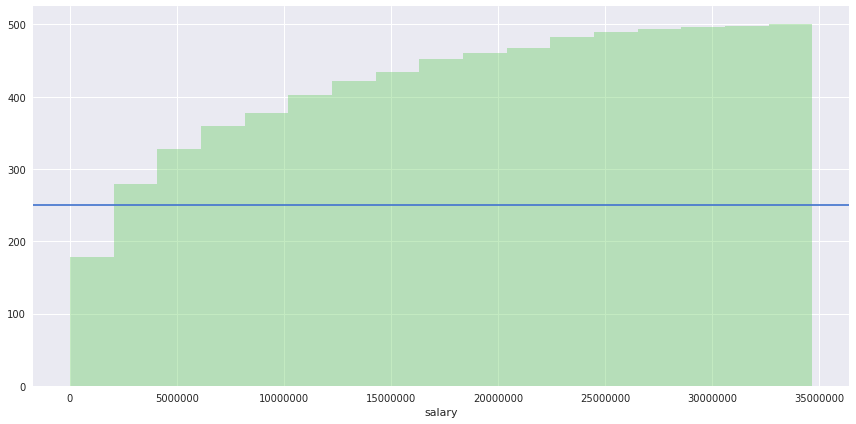

In [12]:
f, ax = plt.subplots(figsize=(12, 6), sharex=True)

ax.get_xaxis().get_major_formatter().set_scientific(False)

sns.despine(left=True)

sns.distplot(salaries, kde=False, color="g", ax=ax, hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
plt.setp(axes, yticks=[])
ax.axhline(y=250)

plt.tight_layout()

To understand better how salaries are distributed, we can use a boxplot. Boxplots allows us to identify outliers:

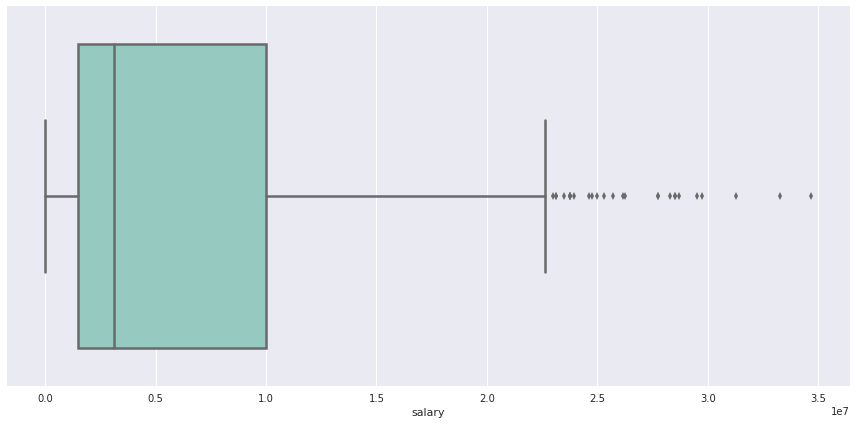

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(salaries, orient='h', ax=ax, palette="Set3", linewidth=2.5)

fig.tight_layout()

Boxplot is using the [Interquartile Range (IQR)](https://en.wikipedia.org/wiki/Interquartile_range) to place the whiskers (both left and right) and the quartiles to draw the box. The line you see inside the box represents the median (or second quartile). (More info in [matplotlib docs](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html) and [seaborn docs](https://seaborn.pydata.org/generated/seaborn.boxplot.html)).

Everything else at the right or left of the whiskers is considered to be an outlier. Let's examine it in detail.

In [12]:
salaries.describe()

count          500.00
mean     6,640,380.41
std      7,343,168.83
min         17,224.00
25%      1,471,382.00
50%      3,125,365.50
75%     10,000,000.00
max     34,682,550.00
Name: salary, dtype: float64

In [13]:
q1 = salaries.quantile(.25)
q2 = salaries.quantile(.5)
q3 = salaries.quantile(.75)
q4 = salaries.quantile(1)

In [14]:
for idx, q in enumerate((q1, q2, q3, q4), start=1):
    print("Q{}: {}".format(idx, q))

Q1: 1471382.0
Q2: 3125365.5
Q3: 10000000.0
Q4: 34682550.0


In [15]:
salaries.median()

3125365.5

The right whisker is set at `Q3 + 1.5 IQR`. The Interquartile Range (IQR) is defined as `Q3 - Q1`:

In [16]:
iqr = q3 - q1
iqr

8528618.0

In [17]:
q3 + (1.5 * iqr)

22792927.0

Putting all together we have:

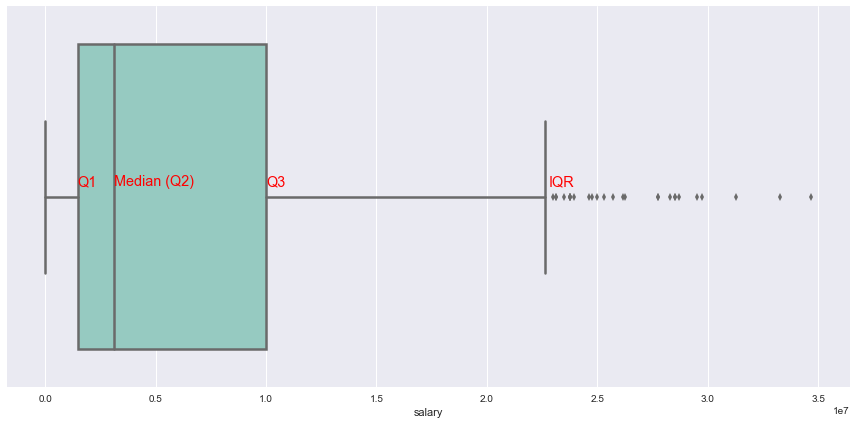

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(salaries, orient='h', ax=ax, palette="Set3", linewidth=2.5)

ax.text(salaries.median(), -0.03, "Median (Q2)", horizontalalignment='left', size='x-large', color='red',)

ax.text(q1, -0.03, "Q1", horizontalalignment='left', size='x-large', color='red',)
ax.text(q3, -0.03, "Q3", horizontalalignment='left', size='x-large', color='red',)
ax.text(q3 + (1.5 * iqr), -0.03, "IQR", horizontalalignment='left', size='x-large', color='red',)
fig.tight_layout()

A similar diagram is a "violin" plot. Which draws the same concepts from a Boxplot but also includes a KDE plot:

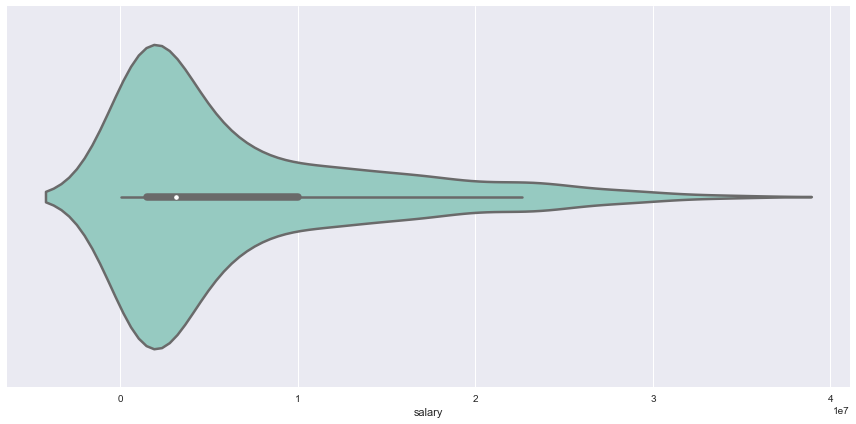

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.violinplot(salaries, orient='h', ax=ax, palette="Set3", linewidth=2.5)

fig.tight_layout()

As a conclusion to this broad analysis, we can say that there aren't a lot of players at the right whisker of our boxplot (`Q3 + 1.5 IQR`) and the ones are probably big stars. We can explore see who they are:

In [20]:
best_salaries = df[df['salary'] >= (q3 + 1.5 * iqr)]
best_salaries

,salary,season_start,season_end,team,team_name,Pos,Age
player,,,,,,,
Gordon Hayward,29727900,2017,2018,BOS,Boston Celtic,SF,26.00
Al Horford,27734405,2017,2018,BOS,Boston Celtic,C,30.00
Dwight Howard,23500000,2017,2018,CHA,Charlotte Hornets,C,31.00
LeBron James,33285709,2017,2018,CLE,Cleveland Caveliers,SF,32.00
Harrison Barnes,23112004,2017,2018,DAL,Dallas Mavericks,PF,24.00
Paul Millsap,31269231,2017,2018,DEN,Denver Nuggets,PF,31.00
Andre Drummond,23775506,2017,2018,DET,Detroit Pistons,C,23.00
Stephen Curry,34682550,2017,2018,GSW,Golden State Warriors,PG,28.00
Kevin Durant,25000000,2017,2018,GSW,Golden State Warriors,PF,28.00


In [21]:
best_salaries.sort_values('salary', ascending=False)

,salary,season_start,season_end,team,team_name,Pos,Age
player,,,,,,,
Stephen Curry,34682550,2017,2018,GSW,Golden State Warriors,PG,28.00
LeBron James,33285709,2017,2018,CLE,Cleveland Caveliers,SF,32.00
Paul Millsap,31269231,2017,2018,DEN,Denver Nuggets,PF,31.00
Gordon Hayward,29727900,2017,2018,BOS,Boston Celtic,SF,26.00
Blake Griffin,29512900,2017,2018,LAC,Los Angeles Clippers,PF,27.00
Kyle Lowry,28703704,2017,2018,TOR,Toronto Raptors,PG,30.00
Mike Conley,28530608,2017,2018,MEM,Memphis Grizzlies,PG,29.00
Russell Westbrook,28530608,2017,2018,OKC,Oklahoma City Thunder,PG,28.00
James Harden,28299399,2017,2018,HOU,Houston Rockets,PG,27.00


In [22]:
best_salaries.shape

(27, 7)

In [23]:
len(best_salaries) / len(df) * 100

5.4

Only 27 players (out of 500) make more than that hard limit imposed by `Q3 + 1.5 * IQR`. And that represents 5.4% of the players.

In [24]:
q3 + (1.5 * iqr)

22792927.0

In [25]:
q1, q2, q3

(1471382.0, 3125365.5, 10000000.0)

We're done with the general analysis. Let's move to discretize our salaries to understand it a little bit better. We'll break it into 3 bins:
* Lowest paid players (below q2)
* Middle Range
* Highest paid players (above the limit)

In [26]:
categories = pd.cut(
    salaries,
    [0, q2, (q3 + 1.5 * iqr), salaries.max()],
    labels=['Lowest Paid', 'Middle Range', 'Highest Paid'])

In [27]:
categories.name = 'Salary Range'

In [28]:
categories.value_counts()

Lowest Paid     250
Middle Range    223
Highest Paid     27
Name: Salary Range, dtype: int64

We can see that we still have 27 highest paid players, and the distribution of Lowest Paid and Middle Range is similar. We can now add the Salary Range to the `DataFrame`:

In [29]:
df['Salary Range'] = categories

In [30]:
df.head()

,salary,season_start,season_end,team,team_name,Pos,Age,Salary Range
player,,,,,,,,
Kent Bazemore,16910113,2017,2018,ATL,Atlanta Hawks,SF,27.00,Middle Range
Dennis Schroder,15500000,2017,2018,ATL,Atlanta Hawks,PG,23.00,Middle Range
Miles Plumlee,12500000,2017,2018,ATL,Atlanta Hawks,C,28.00,Middle Range
Jamal Crawford,10942762,2017,2018,ATL,Atlanta Hawks,SG,36.00,Middle Range
Marco Belinelli,6606060,2017,2018,ATL,Atlanta Hawks,SG,30.00,Middle Range


Now we can get our highest paid players with our previous formula:

In [31]:
df[df['salary'] >= (q3 + 1.5 * iqr)]

,salary,season_start,season_end,team,team_name,Pos,Age,Salary Range
player,,,,,,,,
Gordon Hayward,29727900,2017,2018,BOS,Boston Celtic,SF,26.00,Highest Paid
Al Horford,27734405,2017,2018,BOS,Boston Celtic,C,30.00,Highest Paid
Dwight Howard,23500000,2017,2018,CHA,Charlotte Hornets,C,31.00,Highest Paid
LeBron James,33285709,2017,2018,CLE,Cleveland Caveliers,SF,32.00,Highest Paid
Harrison Barnes,23112004,2017,2018,DAL,Dallas Mavericks,PF,24.00,Highest Paid
Paul Millsap,31269231,2017,2018,DEN,Denver Nuggets,PF,31.00,Highest Paid
Andre Drummond,23775506,2017,2018,DET,Detroit Pistons,C,23.00,Highest Paid
Stephen Curry,34682550,2017,2018,GSW,Golden State Warriors,PG,28.00,Highest Paid
Kevin Durant,25000000,2017,2018,GSW,Golden State Warriors,PF,28.00,Highest Paid


Or with our new category:

In [32]:
df[df['Salary Range'] == 'Highest Paid']

,salary,season_start,season_end,team,team_name,Pos,Age,Salary Range
player,,,,,,,,
Gordon Hayward,29727900,2017,2018,BOS,Boston Celtic,SF,26.00,Highest Paid
Al Horford,27734405,2017,2018,BOS,Boston Celtic,C,30.00,Highest Paid
Dwight Howard,23500000,2017,2018,CHA,Charlotte Hornets,C,31.00,Highest Paid
LeBron James,33285709,2017,2018,CLE,Cleveland Caveliers,SF,32.00,Highest Paid
Harrison Barnes,23112004,2017,2018,DAL,Dallas Mavericks,PF,24.00,Highest Paid
Paul Millsap,31269231,2017,2018,DEN,Denver Nuggets,PF,31.00,Highest Paid
Andre Drummond,23775506,2017,2018,DET,Detroit Pistons,C,23.00,Highest Paid
Stephen Curry,34682550,2017,2018,GSW,Golden State Warriors,PG,28.00,Highest Paid
Kevin Durant,25000000,2017,2018,GSW,Golden State Warriors,PF,28.00,Highest Paid


Now that we have categories, we can use a `countplot` to quickly visualize the distribution of the divisions we made:

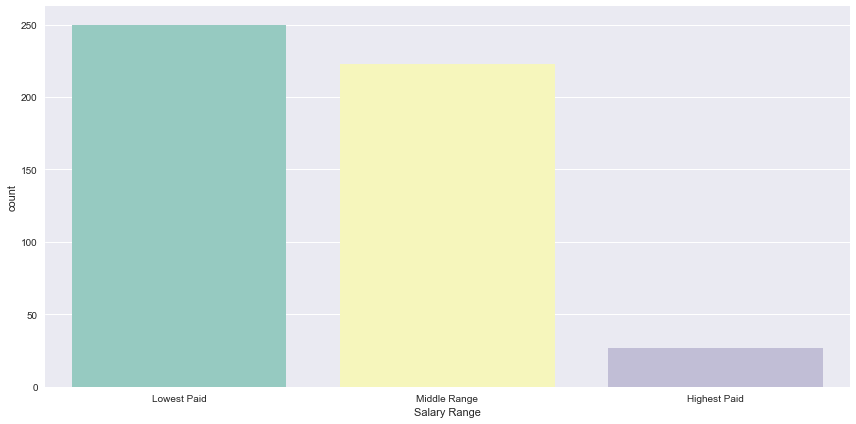

In [33]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.countplot('Salary Range', data=df, ax=ax, palette="Set3")

fig.tight_layout()

We can decide to use the team as a category, and the Salary Range as hue:

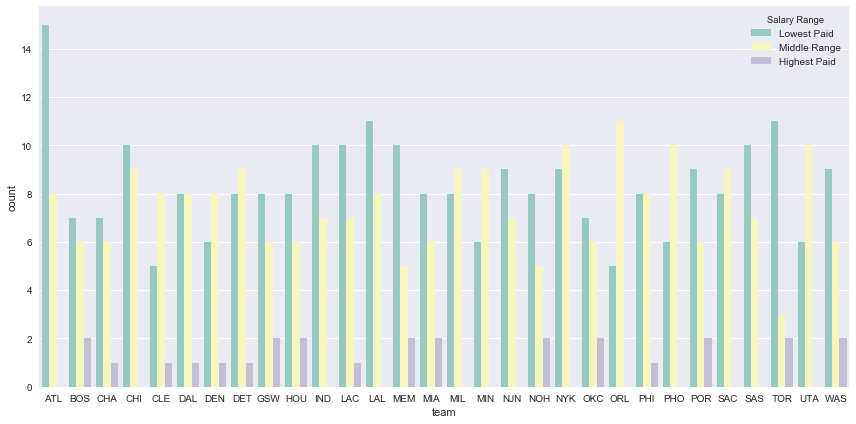

In [34]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.countplot('team', hue='Salary Range', data=df, ax=ax, palette="Set3")

fig.tight_layout()

Quickly screening the plot makes us realize that most teams have similar number of "Highest paid players". A few of them (like LAL, MIL or NJN) don't have a a single "High paid" player. To make sure, we could visualize highest plaid players per team:

In [35]:
highest_paid_players = df[df['Salary Range'] == 'Highest Paid']

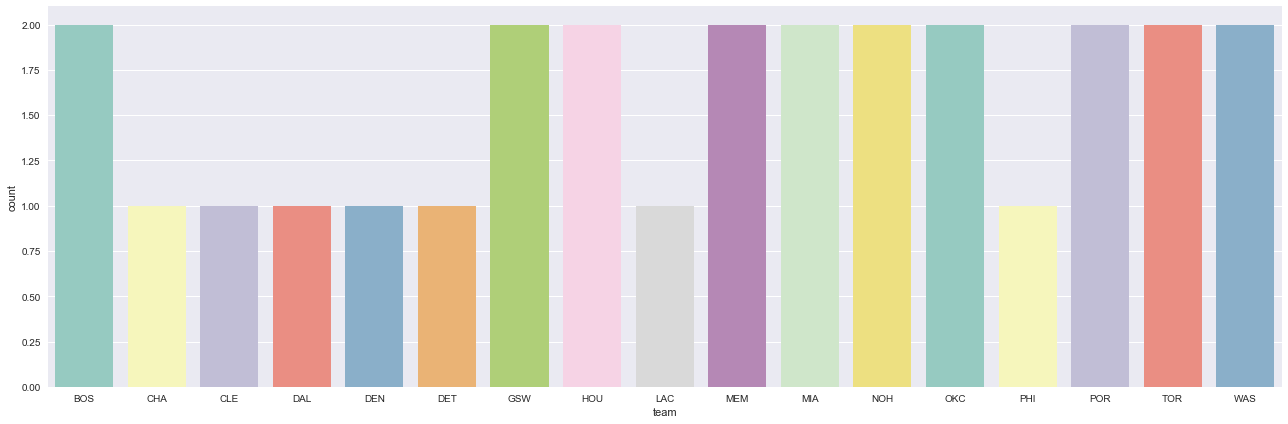

In [36]:
fig, ax = plt.subplots(figsize=(18, 6))

sns.countplot('team', data=highest_paid_players, ax=ax, palette="Set3")

fig.tight_layout()

Which seems to confirm our previous idea. In our second plot we only see those teams that have at least 1 high paid player. The rest are missing. How could we plot all teams? We need to wait until next class when we talk about group and apply 😁.

We can now, at least see how many teams don't have a high paid player. We have 30 teams in total:

In [37]:
df['team'].unique()

array(['ATL', 'BOS', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW',
       'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NJN',
       'NOH', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS',
       'TOR', 'UTA', 'WAS'], dtype=object)

In [38]:
len(df['team'].unique())

30

But our `highest_paid_players` DataFrame has only 17:

In [39]:
highest_paid_players['team'].unique()

array(['BOS', 'CHA', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'LAC',
       'MEM', 'MIA', 'NOH', 'OKC', 'PHI', 'POR', 'TOR', 'WAS'],
      dtype=object)

In [40]:
len(highest_paid_players['team'].unique())

17

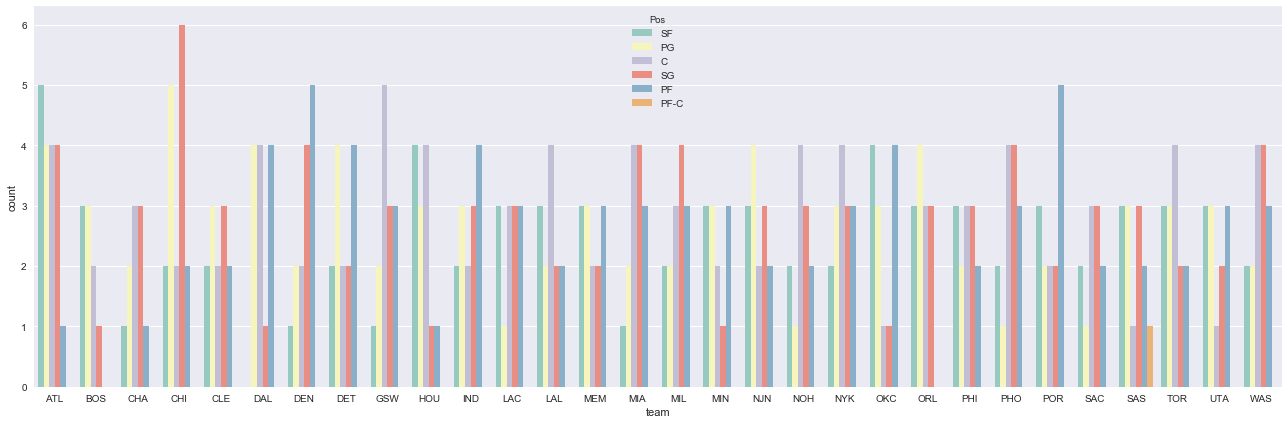

In [41]:
fig, ax = plt.subplots(figsize=(18, 6))

sns.countplot('team', hue='Pos', data=df, ax=ax, palette="Set3")

fig.tight_layout()

We could also make our analysis by position. The question would be: Which positions have the highest paid players?

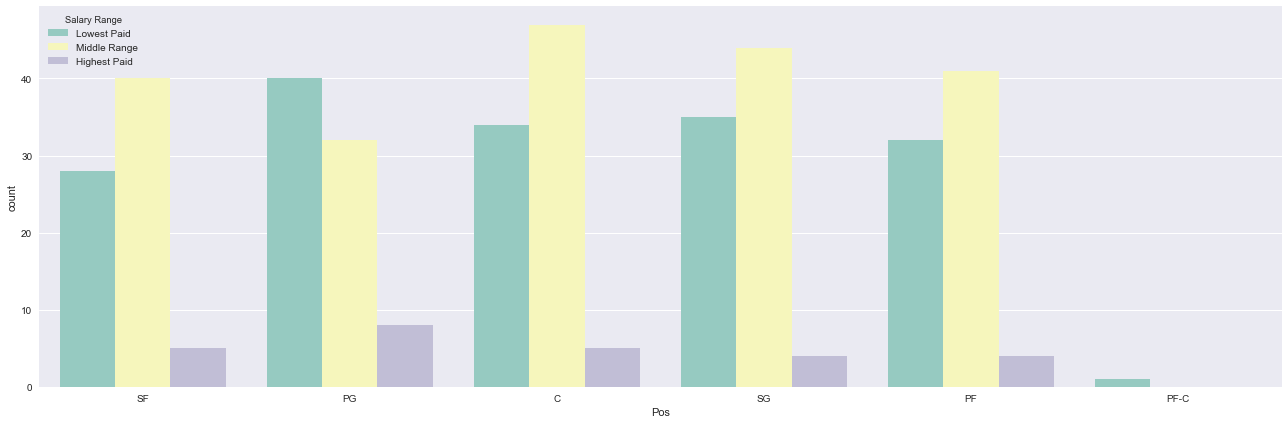

In [42]:
fig, ax = plt.subplots(figsize=(18, 6))

sns.countplot(x='Pos', hue='Salary Range', data=df, ax=ax, palette="Set3")

fig.tight_layout()

In [43]:
df.head()

,salary,season_start,season_end,team,team_name,Pos,Age,Salary Range
player,,,,,,,,
Kent Bazemore,16910113,2017,2018,ATL,Atlanta Hawks,SF,27.00,Middle Range
Dennis Schroder,15500000,2017,2018,ATL,Atlanta Hawks,PG,23.00,Middle Range
Miles Plumlee,12500000,2017,2018,ATL,Atlanta Hawks,C,28.00,Middle Range
Jamal Crawford,10942762,2017,2018,ATL,Atlanta Hawks,SG,36.00,Middle Range
Marco Belinelli,6606060,2017,2018,ATL,Atlanta Hawks,SG,30.00,Middle Range


![separator1](https://i.imgur.com/ZUWYTii.png)

### Scatter plots

How is Age related to salary? Is there any relationship at all? The easiest way to visualize a relationship between two variables is with a Scatter plot:

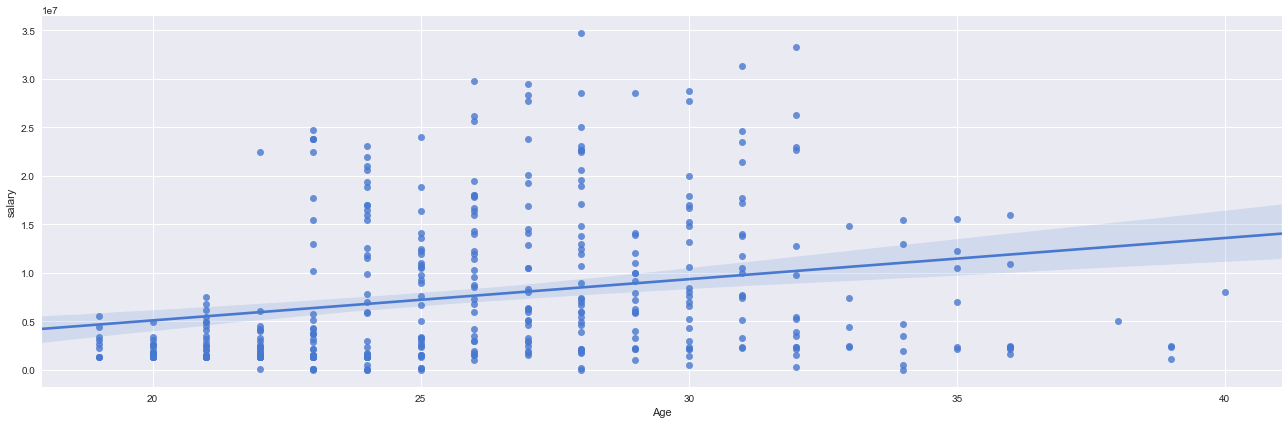

In [44]:
fig, ax = plt.subplots(figsize=(18, 6))

sns.regplot(x='Age', y='salary', data=df, ax=ax)

fig.tight_layout()

If you have numbers that are too large, sometimes it's easier visualize it with a logarithmic scale:

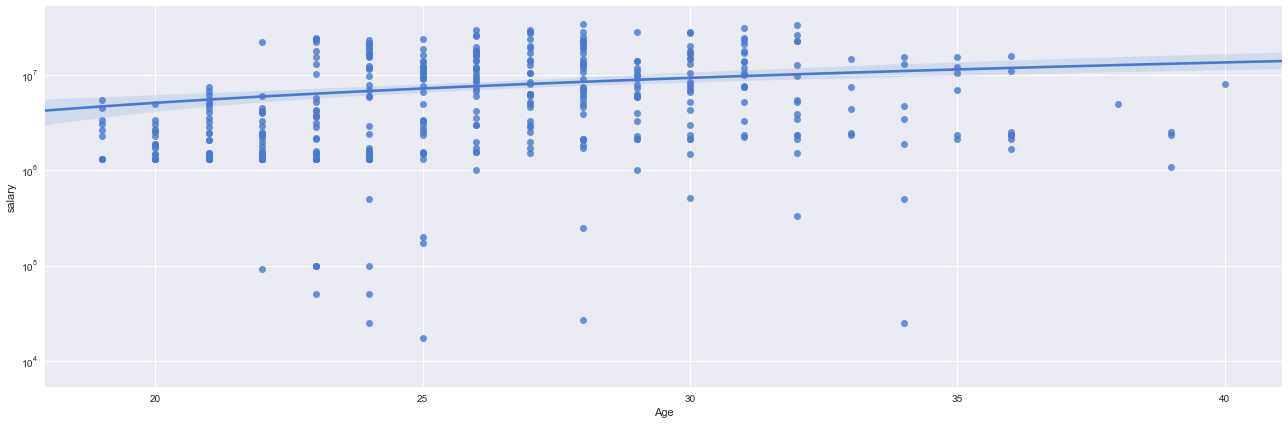

In [45]:
fig, ax = plt.subplots(figsize=(18, 6))

sns.regplot(x='Age', y='salary', data=df, ax=ax)
ax.set_yscale('log')
fig.tight_layout()

We can also use a simple Bar plot to showcase the different Positions and Salaries. In this case, we're using the sum of the salaries by position:

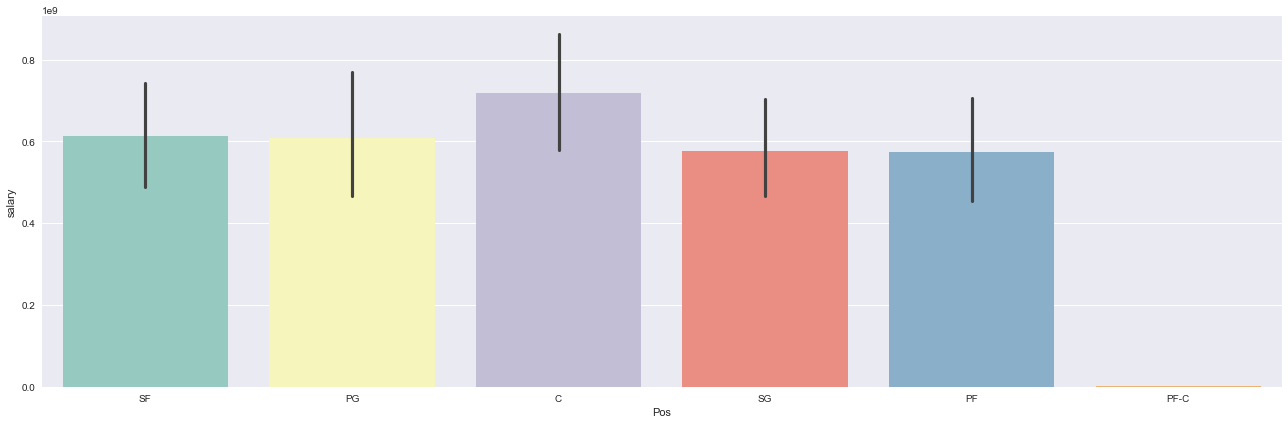

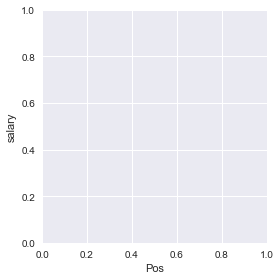

In [46]:
fig, ax = plt.subplots(figsize=(18, 6))

sns.factorplot(x='Pos', y='salary', data=df, ax=ax, palette="Set3", kind='bar', estimator=np.sum)

fig.tight_layout()

`PF-C` has way less players, so we can also use the log scale to visualize it a little bit better.

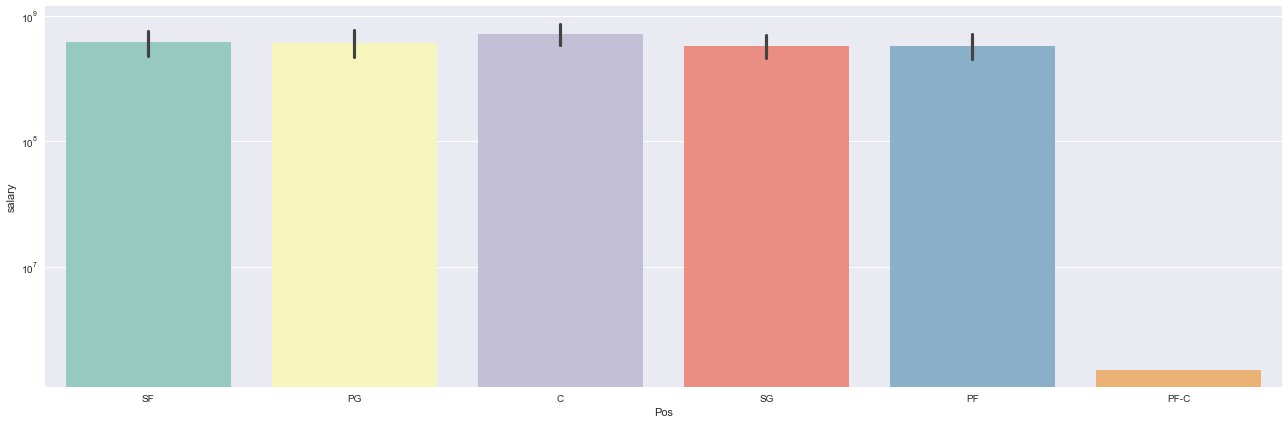

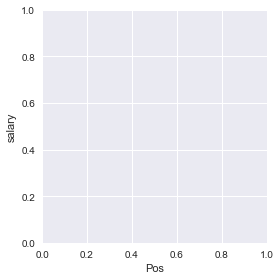

In [47]:
fig, ax = plt.subplots(figsize=(18, 6))

sns.factorplot(x='Pos', y='salary', data=df, ax=ax, palette="Set3", kind='bar', estimator=np.sum)
ax.set_yscale('log')
fig.tight_layout()

But don't abuse the log scale. Our biggest problem in this case might be just Data Cleaning. We haven't normalized `PF-C` to any discrete position (either `PF` or `C`).

Another useful method to visualize these relationships is with a [pointplot](https://seaborn.pydata.org/generated/seaborn.pointplot.html#seaborn.pointplot):

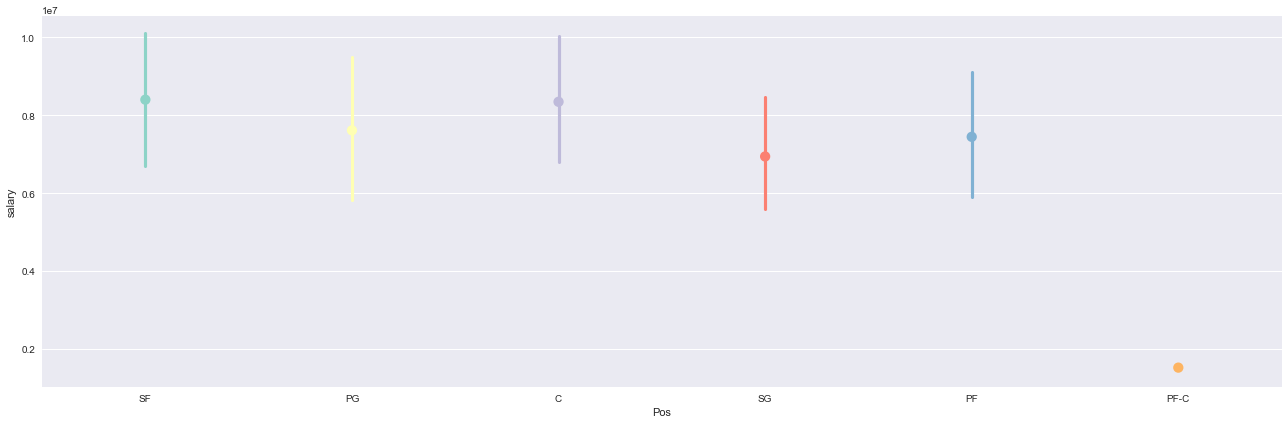

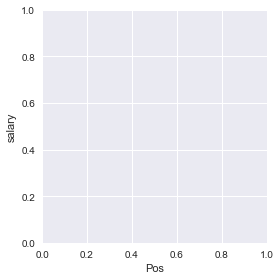

In [48]:
fig, ax = plt.subplots(figsize=(18, 6))

sns.factorplot(x='Pos', y='salary', data=df, ax=ax, palette="Set3", kind='point')

fig.tight_layout()

Can you think about other relationships? Other questions to ask about salaries?

![separator2](https://i.imgur.com/4gX5WFr.png)